> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No_show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment 


● We will try to find out if there is any characteristics (columns) have any effect on patients attendance ,

throught the analysis we will compare the attendace and other characteristics to see if any of those characteristics 

effect the attendance of the patient


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
#loading the data 
df=pd.read_csv('noshow.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#printing the number of coulmns and rows
df.shape

(110527, 14)

In [7]:
#gathering information about the data types on the dataset
#and looking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#gathering some info from the data like the mean of each coulmn
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
#removing unnecessary coulmns(data) that will not need 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1 , inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#renaming the No-show column to No_show 
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#finding the false value
df.query( 'Age==-1')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#removing the false vakue
# df.drop(99832 ,axis=0 ,inplace= True)

In [13]:
#checking if the value is removed
df.query( 'Age==-1')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Investigating the Dataset

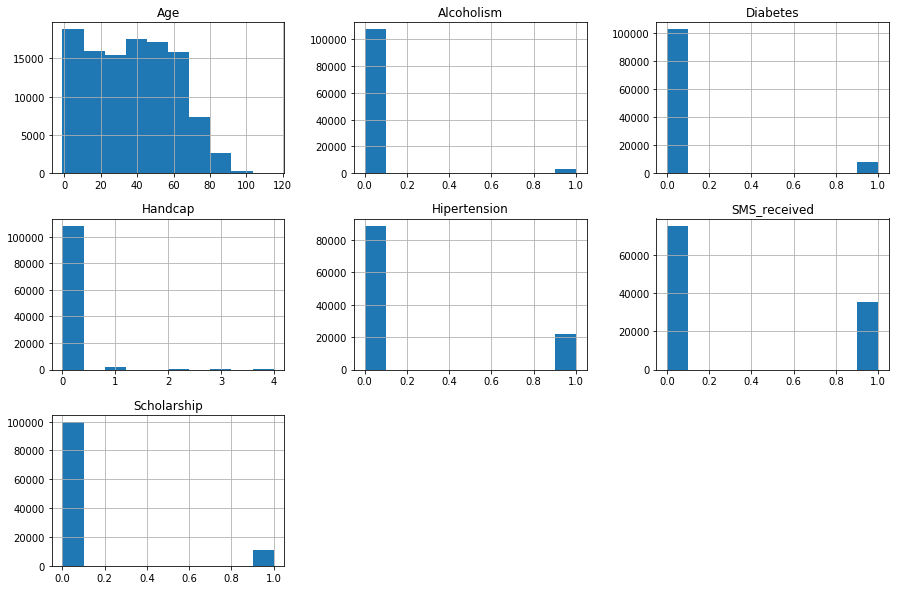

In [14]:
df.hist(figsize=(15,10));

● Most of the patients didnot have ( Diabetes , Alcoholism , Hipertension ) 


● Most of the patients didnot have a Handcap , The percentage of having more than one disability is almost non-existent

● The number of patients who received SMS message is half the number of those who didnot 


In [15]:
#finding the number of people who attended and the people didnot attend
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [16]:
#reassigning values to (attend , donot_attend)
attended = df.No_show =='No'
didnot_attend = df.No_show =='Yes'

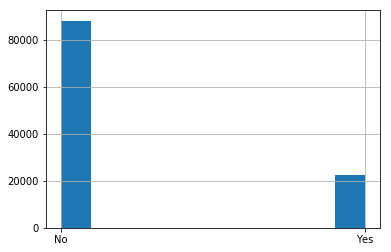

In [17]:
#comparing the number of people who attende and people who didnot attend in genral
df['No_show'].hist();

● In genral the number of people who attended was more than the number of people who didnot attend

● 79.8% of the patients attended , and 20.2% of the patient didnot attend

In [19]:
def pie (char):
    df[char].value_counts().plot(kind='pie' , autopct='%0.2f%%')

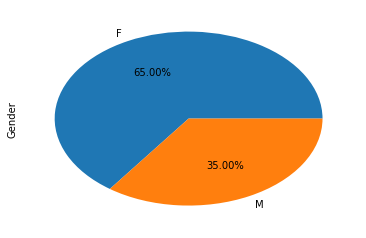

In [20]:
pie('Gender')

● In genral most of the patients is Females
 ( 65% Females , 35% Males )

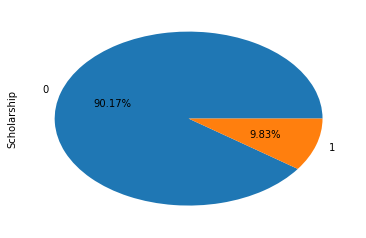

In [21]:
pie('Scholarship')

●most of the patients dosenot have a scholarship ( 90,17% donot have , 9.83% have )

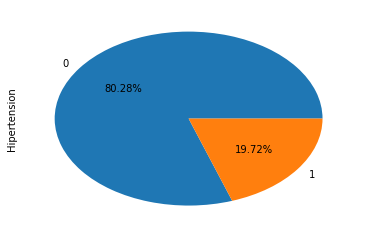

In [54]:
pie('Hipertension')

●most of the patients donot have Hipertension (80.28% donot have , 19.72% have )

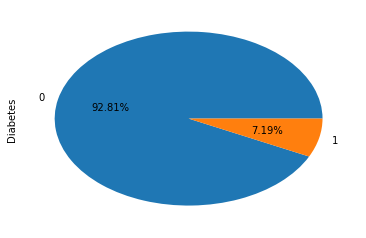

In [55]:
pie('Diabetes')

●most of the patients donot have Diabetes (92.81% donot have , 7.19% have )

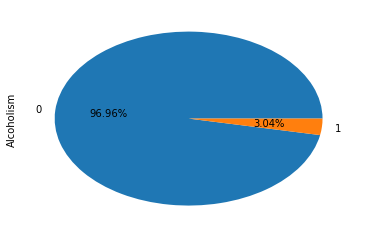

In [56]:
pie('Alcoholism')

●most of the patients donot have Alcoholism (96.96% donot have , 3.04% have )

### Figuring out the relation between characteristics (coulmns)

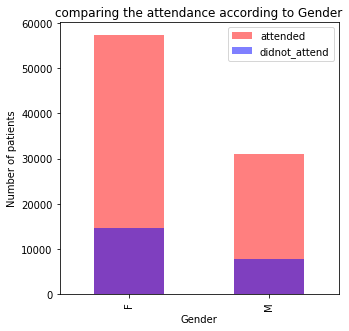

In [22]:
# comparing the attendance according to gender 
plt.figure(figsize=[5,5])
df.Gender[attended].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended')
df.Gender[didnot_attend].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Gender')
plt.title('comparing the attendance according to Gender');


In [23]:
#the number of patients who attended
df.Gender[attended].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

In [24]:
# the number of patients who Did not attend
df.Gender[didnot_attend].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

● There is no clear relation between gendaer and the attendance

● Because the number of females that attended was higher than males
 , also the number of females who didnot attend was higher than males

# figuring out if the age affect the attendance

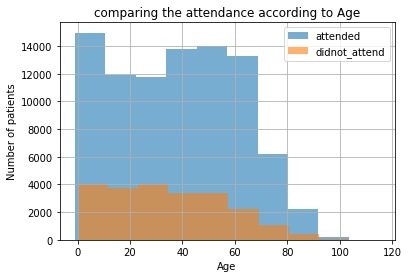

In [27]:
# comparing the attendance according to age 
df.Age[attended].hist(alpha=0.6 , label='attended')
df.Age[didnot_attend].hist(alpha=0.6 , label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.title('comparing the attendance according to Age');

In [28]:
# the number of patients who attended
df.Age[attended].value_counts()

 0      2900
 1      1858
 52     1449
 56     1372
 2      1366
        ... 
 100       4
 115       2
 102       2
-1         1
 99        1
Name: Age, Length: 104, dtype: int64

In [29]:
# the number of patients who didnot attend
df.Age[didnot_attend].value_counts()

0      639
1      415
17     396
19     394
30     369
      ... 
95       6
115      3
97       2
96       1
98       1
Name: Age, Length: 100, dtype: int64

● The highest attendance rate is on the younger patients from ( less than year ) -10 years

● The older the patient the more likely the donot attend

# figuring out if the Scholarship affect the attendance

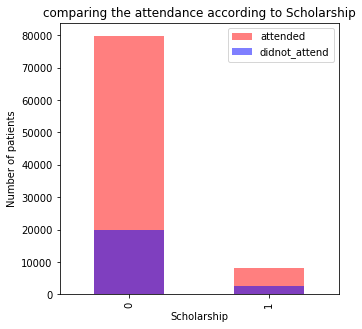

In [30]:
# comparing the attendance according to Scholarship
plt.figure(figsize=[5,5])
df.Scholarship[attended].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended')
df.Scholarship[didnot_attend].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Scholarship')
plt.title('comparing the attendance according to Scholarship');

In [31]:
# the number of patients who attended
df.Scholarship[attended].value_counts()

0    79925
1     8283
Name: Scholarship, dtype: int64

In [32]:
# the number of patients who Did not attend
df.Scholarship[didnot_attend].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

● There is no clear relation between being enrolled on Scholarship and the attendance

● Because the number of people who attended without having Scholarship is higher than the people who didnot but also there  

is more people who didnot attend who have the Scholarship was more than the people without Scholarship


# figuring out if the Hipertension affect the attendance

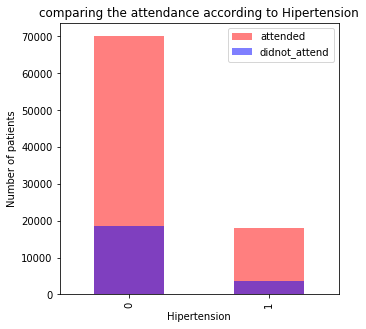

In [33]:
# comparing the attendance according to Hipertension 
plt.figure(figsize=[5,5])
df.Hipertension[attended].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended')
df.Hipertension[didnot_attend].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Hipertension')
plt.title('comparing the attendance according to Hipertension');

In [34]:
# the number of patients who attended
df.Hipertension[attended].value_counts()

0    70179
1    18029
Name: Hipertension, dtype: int64

In [35]:
# the number of patients who didnot attend
df.Hipertension[didnot_attend].value_counts()

0    18547
1     3772
Name: Hipertension, dtype: int64

● There is no clear relation between having Hipertension and the attendance

● Because the number of people who attended without having Hipertension is higher than the people who didnot have

Hipertension but also there is more people who didnot attend who has the Hipertension was more than the people without 

Hipertension



# figuring out if the Diabetes affect the attendance

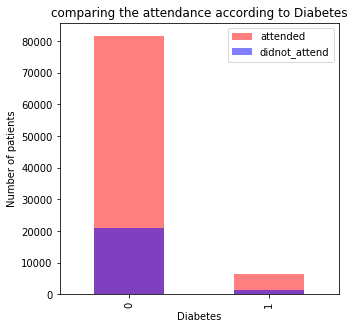

In [36]:
# comparing the attendance according to Diabetes 
plt.figure(figsize=[5,5])
df.Diabetes[attended].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended')
df.Diabetes[didnot_attend].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Diabetes')
plt.title('comparing the attendance according to Diabetes');

In [37]:
# the number of patients who attended
df.Diabetes[attended].value_counts()

0    81695
1     6513
Name: Diabetes, dtype: int64

In [38]:
# the number of patients who didnot attend
df.Diabetes[didnot_attend].value_counts()

0    20889
1     1430
Name: Diabetes, dtype: int64

● There is no clear relation between having  Diabetes and the attendance

● Because the number of people who attended without having Diabetes is higher than the people who didnot have

Diabetes but also there is more people who didnot attend who has the Diabetes was more than the people without

Diabetes

# figuring out if the Alcoholism affect the attendance

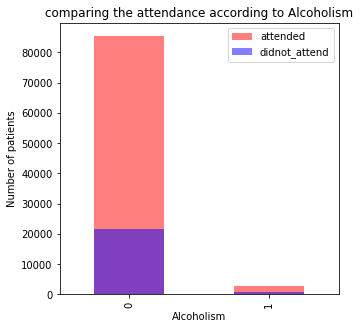

In [39]:
# comparing the attendance according to Alcoholism 
plt.figure(figsize=[5,5])
df.Alcoholism[attended].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended')
df.Alcoholism[didnot_attend].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Alcoholism')
plt.title('comparing the attendance according to Alcoholism');

In [40]:
# the number of patients who attended
df.Alcoholism[attended].value_counts()

0    85525
1     2683
Name: Alcoholism, dtype: int64

In [41]:
# the number of patients who didnot attend
df.Alcoholism[didnot_attend].value_counts()

0    21642
1      677
Name: Alcoholism, dtype: int64

● There is no clear relation between having  Alcoholism and the attendance

● Because the number of people who attended without having Alcoholism is higher than the people who didnot have

Alcoholism but also there is more people who didnot attend who has the Alcoholism was more than the people without

Alcoholism

# figuring out if the Handcap affect the attendance

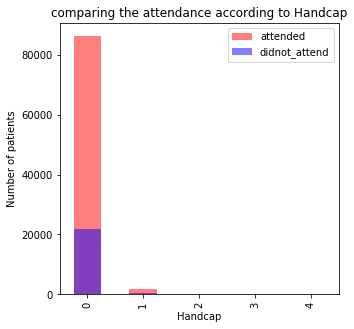

In [42]:
# comparing the attendance according to SMS received 
plt.figure(figsize=[5,5])
df.Handcap[attended].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended')
df.Handcap[didnot_attend].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Handcap')
plt.title('comparing the attendance according to Handcap');

In [43]:
# the number of patients who attended
df.Handcap[attended].value_counts()

0    86374
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64

In [44]:
# the number of patients who didnot attend
df.Handcap[didnot_attend].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: Handcap, dtype: int64

_There is no clear relation between having  a Handcap and the attendance

_Because the number of people who attended without having Handcap is higher than the people who didnot have

Handcap but also there is more people who didnot attend who has the Handcap was more than the people without

Handcap

# figuring out if receiving SMS  affect the attendance

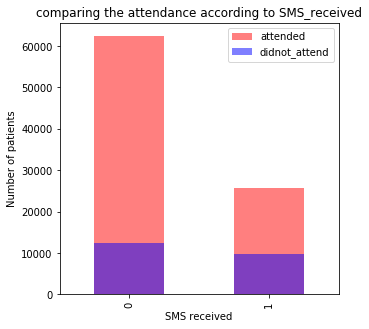

In [45]:
# comparing the attendance according to SMS received 
plt.figure(figsize=[5,5])
df.SMS_received[attended].value_counts().plot(kind='bar',alpha=0.5,color='red',label='attended')
df.SMS_received[didnot_attend].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('SMS received')
plt.title('comparing the attendance according to SMS_received');

In [46]:
# the number of patients who attended
df.SMS_received[attended].value_counts()

0    62510
1    25698
Name: SMS_received, dtype: int64

In [47]:
# the number of patients who didnot attend
df.SMS_received[didnot_attend].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

● The number of patients who attended without receiving SMS message is more than the number of patients who attended with
receiving SMS message!!!

# figuring out if the Neighbourhood affect the attendance

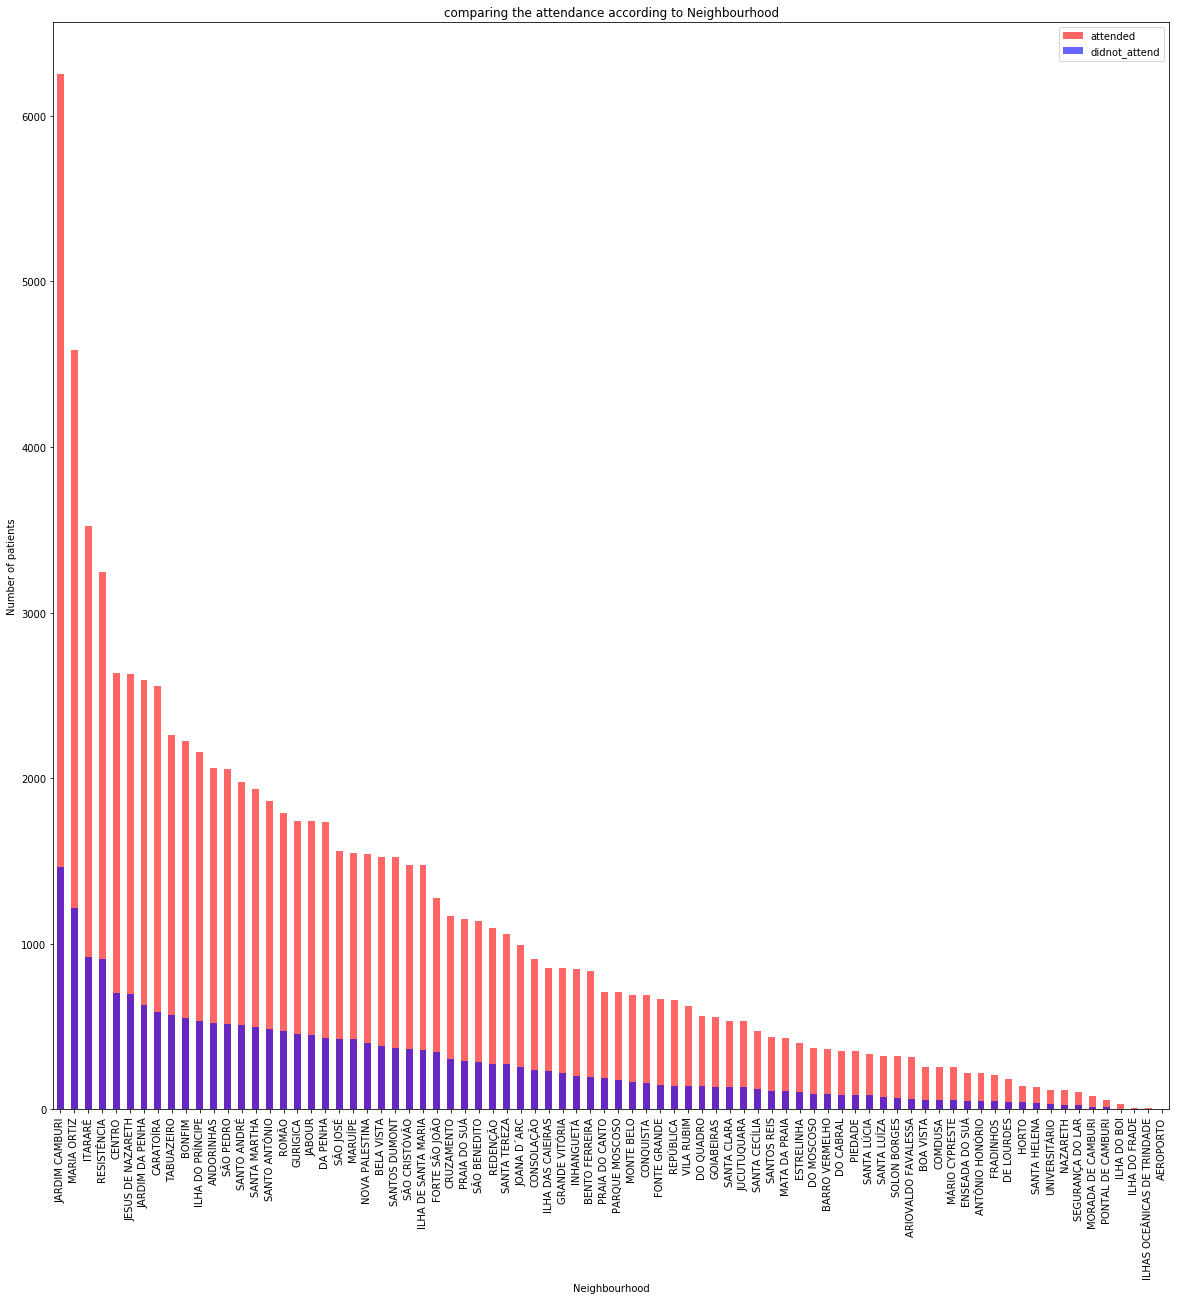

In [51]:
# comparing the attendance according to Neighbourhood 
plt.figure(figsize=[20,20])
df.Neighbourhood[attended].value_counts().plot(kind='bar',alpha=0.6,color='red',label='attended')
df.Neighbourhood[didnot_attend].value_counts().plot(kind='bar',alpha=0.6,color='blue',label='didnot_attend')
plt.legend()
plt.ylabel('Number of patients')
plt.xlabel('Neighbourhood')
plt.title('comparing the attendance according to Neighbourhood');

● There is a clear relation between the Neighbourhood and the attendance 

## Conclusions


There is some factor that can change (increasing or decreasing) the attendance of the patients like:

1- The age of the patient

2- The Neighbourhood in which the patient lives


<a id='conclusions'></a>


### Limitations
1- There was no clear relation between alot of characteristics and attendance like (Handcap,Hipertension,..)

2- The relation between the attendance and the SMS received was strange because The number of patients who attended without receiving SMS message is more than the number of patients who attended with
receiving SMS message!!! 



In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0